## 1. Importación de librerías

En esta sección importamos las librerías necesarias para:

- Manipulación de datos
- Visualización
- Entrenamiento/exportación del modelo
- Evaluación

In [2]:
# Cálculo
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Exportación del modelo
import joblib

# Datos de Kaggle
import kagglehub


## 2. Carga del dataset

Cargamos el dataset que contiene información sobre hábitos de estudio y rendimiento académico.

In [44]:
# Download latest version
df = pd.read_csv("C:/Users/under/Documents/F5/projects/Proyect V - Linear regression/Proyecto5_Regression_Equipo1/data/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# 3. Inspección inicial

Analizamos:

- Número de filas y columnas
- Tipos de datos
- Valores nulos
- Estadísticas básicas

In [45]:

print("Numero_filas: ", df.shape[0], "\nNumero_columnas: ", df.shape[1])


Numero_filas:  10000 
Numero_columnas:  6


In [46]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB


In [35]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [47]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [48]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


## 4. Análisis Exploratorio

Analizamos la distribución del Performance Index.


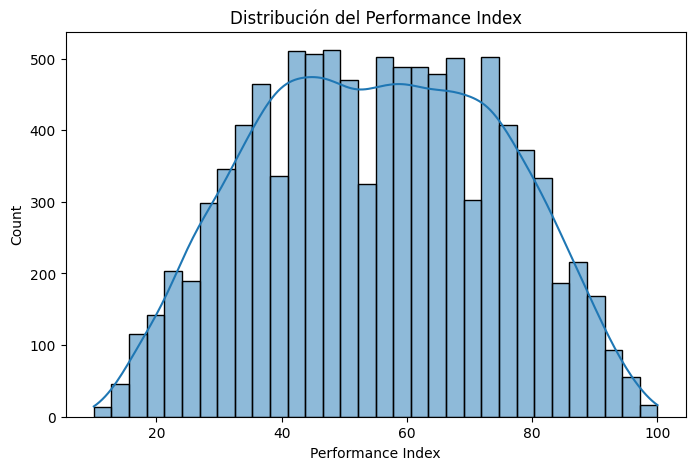

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df["Performance Index"], kde=True)
plt.title("Distribución del Performance Index")
plt.show()


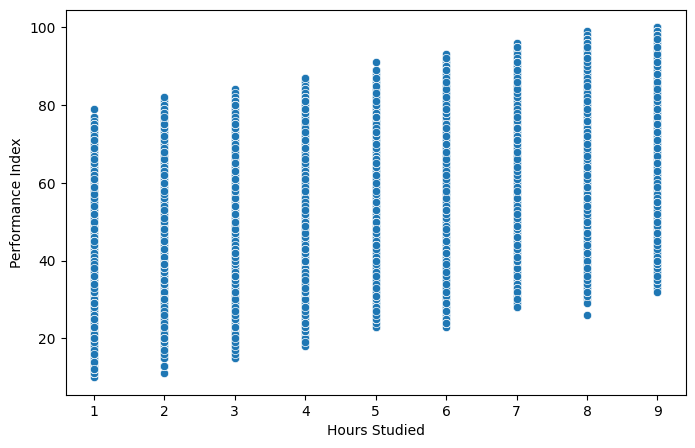

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Hours Studied"], y=df["Performance Index"])
plt.show()


1. Conclusión: Las horas de estudio NO son el único factor determinante
2. Conclusión: Con 5 horas de estudio, hay estudiantes desde ~25 hasta ~93 (y asi en todas las líneas de dispersión)
3. Incluso con pocas horas, algunos alcanzan ~80

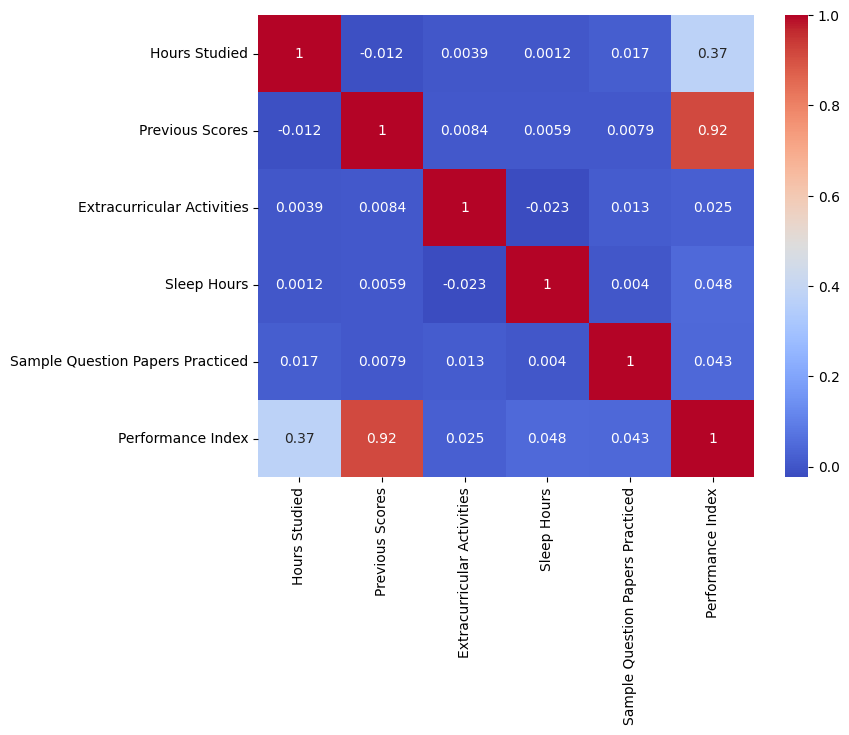

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


1. Previous Scores: 0.92
   * ¡CORRELACIÓN MUY FUERTE!
   * Insight: El desempeño pasado predice el futuro
2. Hours Studied: 0.37
   * Correlación MODERADA-BAJA
   * Influye, pero no es determinante
3. Sleep Hours, Sample Papers, Extracurricular: correlaciones insignificantes
   * Descartarlas o hacer feature engineering.

> ¿Por qué variables como "dormir" y "practicar exámenes" no correlacionan? ¿Será que el dataset tiene problemas o realmente no influyen tanto como pensamos?

## 5. Preparación de datos

In [61]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Esto a cambiar para validación cruzada

## 6. Entrenamiento del modelo

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 7. Evaluación

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [59]:
# Metricas
r2_train = r2_score(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)

mae = mean_absolute_error(y_test, y_test_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R2 Train:", r2_train)

print("R2 Test:", r2_test)

print("MAE:", mae)

print("RMSE:", rmse)



R2 Train: 0.9886898790682355
R2 Test: 0.9889832909573145
MAE: 1.6111213463123044
RMSE: 2.0205515085050054


In [60]:
print("Overfitting:", r2_train - r2_test)

Overfitting: -0.0002934118890790538


## 8. Interpretación

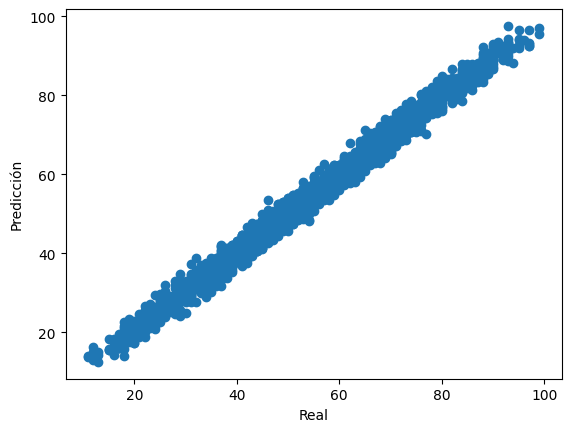

In [63]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Real")

plt.ylabel("Predicción")

plt.show()


## 9. Exportación del modelo

In [64]:
joblib.dump(model, "modelo_multiple.pkl")

['modelo_multiple.pkl']

## 10. Validación cruzada

In [ ]:
from sklearn.model_selection import cross_validate

# Definir múltiples métricas
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',      # Negativo porque sklearn minimiza
    'rmse': 'neg_root_mean_squared_error'  # Negativo porque sklearn minimiza
}
model = "modelo_multiple.pkl"
# Ejecutar validación cruzada
cv_results = cross_validate(
    model,
    X,
    y,
    cv=5,
    scoring=scoring,
    return_train_score=True,  # Para detectar overfitting
    n_jobs=-1
)

# Procesar resultados
print("="*60)
print("VALIDACIÓN CRUZADA - MÚLTIPLES MÉTRICAS")
print("="*60)

# R²
print("\n📊 R² Score:")
print(f"  Train: {cv_results['train_r2'].mean():.4f} (±{cv_results['train_r2'].std():.4f})")
print(f"  Test:  {cv_results['test_r2'].mean():.4f} (±{cv_results['test_r2'].std():.4f})")
print(f"  Overfitting: {cv_results['train_r2'].mean() - cv_results['test_r2'].mean():.4f}")

# MAE (convertir de negativo a positivo)
print("\n📏 MAE:")
print(f"  Train: {-cv_results['train_mae'].mean():.4f} (±{cv_results['train_mae'].std():.4f})")
print(f"  Test:  {-cv_results['test_mae'].mean():.4f} (±{cv_results['test_mae'].std():.4f})")

# RMSE (convertir de negativo a positivo)
print("\n📐 RMSE:")
print(f"  Train: {-cv_results['train_rmse'].mean():.4f} (±{cv_results['train_rmse'].std():.4f})")
print(f"  Test:  {-cv_results['test_rmse'].mean():.4f} (±{cv_results['test_rmse'].std():.4f})")

print(f"\n⏱️ Tiempo de ejecución: {cv_results['fit_time'].sum():.2f}s")

NameError: name 'modelo_multiple' is not defined